# Principal Component Analysis (PCA) for Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['AAPL','MSFT','AMD','NVDA','GE']
start = '2012-01-01'
end = '2019-09-11'

# Read data 
dataset = yf.download(symbols,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  5 of 5 downloaded


,AAPL,AMD,GE,MSFT,NVDA
Date,,,,,
2012-01-03,51.269413,5.48,13.776225,22.156071,12.939396
2012-01-04,51.544937,5.46,13.926292,22.677486,13.086854
2012-01-05,52.117188,5.46,13.918791,22.909233,13.556875
2012-01-06,52.662014,5.43,13.993821,23.265116,13.400198
2012-01-09,52.578468,5.59,14.151395,22.958887,13.400198


In [3]:
#Arrange the data in ascending order
dataset = dataset.iloc[::-1]
print(dataset.round(2))

              AAPL    AMD     GE    MSFT    NVDA
Date                                            
2019-09-11  223.59  29.76   9.35  136.12  184.33
2019-09-10  216.70  30.23   9.13  136.08  183.18
2019-09-09  214.17  30.50   8.95  137.52  180.50
2019-09-06  213.26  30.56   8.70  139.10  178.65
2019-09-05  213.28  31.50   8.80  140.05  179.74
2019-09-04  209.19  30.95   8.79  137.63  168.76
2019-09-03  205.70  30.90   8.32  136.04  164.17
2019-08-30  208.74  31.45   8.24  137.86  167.51
2019-08-29  209.01  31.45   8.10  138.12  167.00
2019-08-28  205.53  30.78   7.93  135.56  161.22
2019-08-27  204.16  30.20   7.92  135.74  161.64
2019-08-26  206.49  30.28   8.04  135.45  165.29
2019-08-23  202.64  29.54   7.96  133.39  162.28
2019-08-22  212.46  31.90   8.18  137.78  171.31
2019-08-21  212.64  31.70   8.15  138.79  171.06
2019-08-20  210.36  30.72   8.37  137.26  167.70
2019-08-19  210.35  31.48   8.66  138.41  170.61
2019-08-16  206.50  31.18   8.78  136.13  159.40
2019-08-15  201.74  

In [4]:
#Compute stock returns and print the returns in percentage format
stock_ret = dataset.pct_change()[1:]
print(stock_ret.round(4)*100)

            AAPL    AMD     GE  MSFT  NVDA
Date                                      
2019-09-10 -3.08   1.58  -2.35 -0.03 -0.62
2019-09-09 -1.17   0.89  -1.97  1.06 -1.46
2019-09-06 -0.42   0.20  -2.79  1.15 -1.02
2019-09-05  0.01   3.08   1.15  0.68  0.61
2019-09-04 -1.92  -1.75  -0.11 -1.73 -6.11
2019-09-03 -1.67  -0.16  -5.34 -1.16 -2.72
2019-08-30  1.48   1.78  -0.96  1.34  2.03
2019-08-29  0.13   0.00  -1.70  0.19 -0.30
2019-08-28 -1.66  -2.13  -2.10 -1.85 -3.46
2019-08-27 -0.67  -1.88  -0.13  0.13  0.26
2019-08-26  1.14   0.26   1.51 -0.21  2.26
2019-08-23 -1.86  -2.44  -0.99 -1.52 -1.82
2019-08-22  4.85   7.99   2.76  3.29  5.57
2019-08-21  0.08  -0.63  -0.37  0.73 -0.15
2019-08-20 -1.07  -3.09   2.70 -1.10 -1.96
2019-08-19 -0.00   2.47   3.46  0.84  1.73
2019-08-16 -1.83  -0.95   1.38 -1.65 -6.57
2019-08-15 -2.31  -4.84  -8.87 -1.80 -6.76
2019-08-14  0.50   1.92  12.73  0.22  0.87
2019-08-13  3.07   6.18   3.54  3.10  3.98
2019-08-12 -4.06   1.00  -3.21 -2.03 -2.95
2019-08-09 

In [5]:
from sklearn.decomposition import PCA
num_pc = 4

X = np.asarray(stock_ret)
[n,m] = X.shape
print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 4 PCA'.format(percentage_cum[-1]*100))

The number of timestamps is 1934.
The number of stocks is 5.
95.23% of the variance is explained by the first 4 PCA


In [6]:
pca_components = pca.components_

(50, 100)

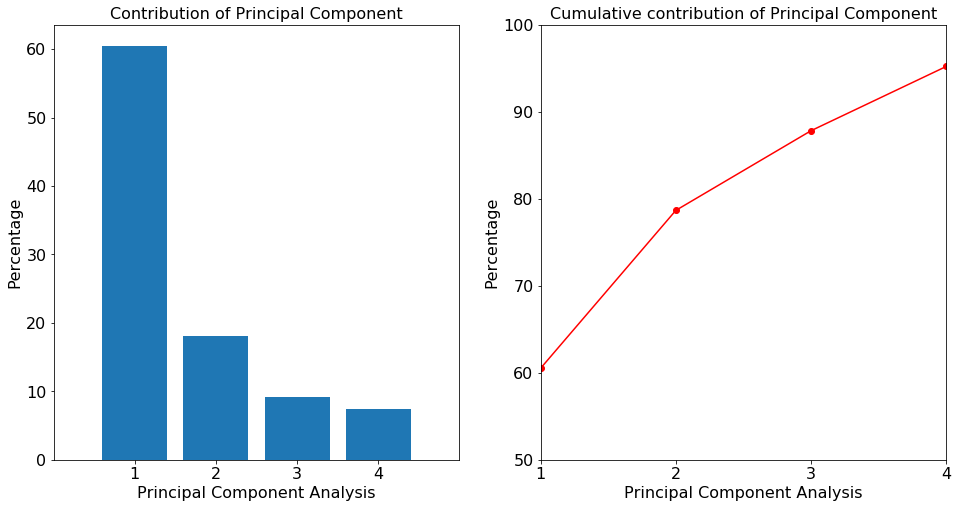

In [7]:
x = np.arange(1,len(percentage)+1,1)

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of Principal Component',fontsize = 16)
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('Principal Component Analysis',fontsize = 16)
plt.ylabel('Percentage',fontsize = 16)
plt.title('Cumulative contribution of Principal Component',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100])

In [8]:
# Statistical risk factors
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2", "factor 3","factor 4"], 
                              index=stock_ret.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2,factor 3,factor 4
Date,,,,
2019-09-10,0.003604,-0.029151,0.025482,-0.001417
2019-09-09,-0.000403,-0.020386,0.006553,0.011305
2019-09-06,-0.004615,-0.013395,0.010374,0.021540
2019-09-05,0.032175,-0.004606,-0.005984,-0.007376
2019-09-04,-0.044815,-0.047094,-0.020641,-0.006933


In [9]:
factor_exposures = pd.DataFrame(index=["Portfolio 1", "Portfolio 2", "Portfolio 3","Portfolio 4"], 
                                columns=stock_ret.columns,
                                data = pca.components_).T

In [10]:
factor_exposures

,Portfolio 1,Portfolio 2,Portfolio 3,Portfolio 4
AAPL,0.160969,0.359808,-0.496848,0.634381
AMD,0.886794,-0.460958,-0.031533,0.010837
GE,0.127969,0.270651,-0.604646,-0.730939
MSFT,0.158041,0.322146,-0.227724,0.211936
NVDA,0.382534,0.693560,0.578526,-0.135108


In [11]:
labels = factor_exposures.index
data = factor_exposures.values

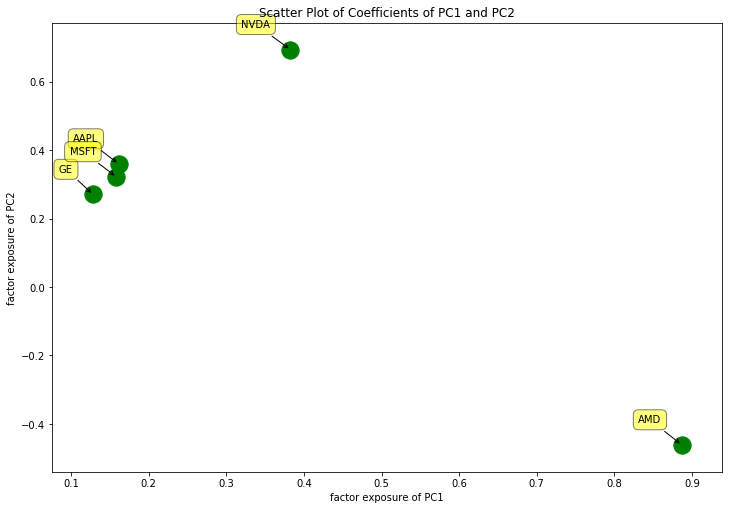

In [12]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

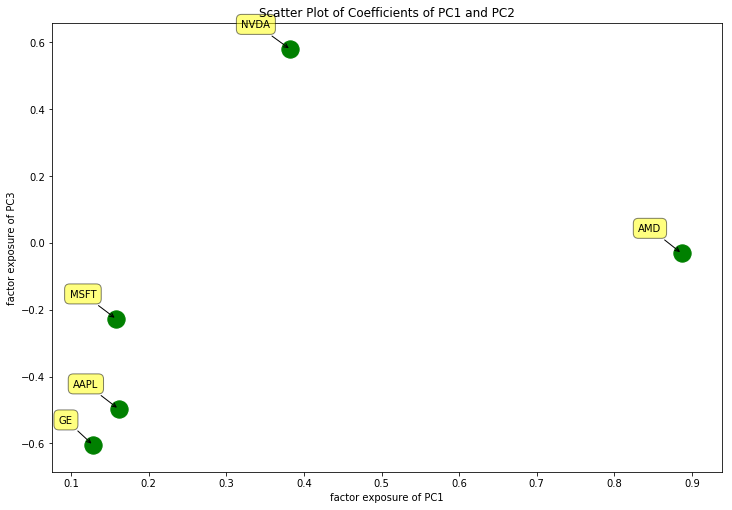

In [13]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 2], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC3')

for label, x, y in zip(labels, data[:, 0], data[:, 2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

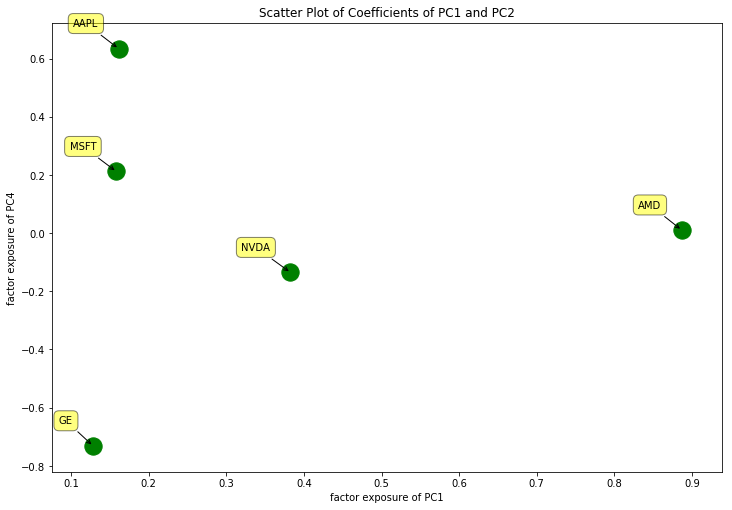

In [14]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 3], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC4')

for label, x, y in zip(labels, data[:, 0], data[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

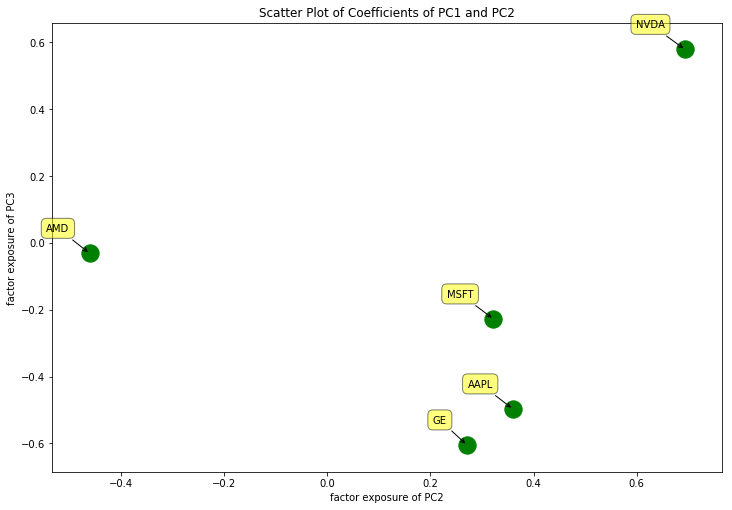

In [15]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 1], data[:, 2], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC2')
plt.ylabel('factor exposure of PC3')

for label, x, y in zip(labels, data[:, 1], data[:, 2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

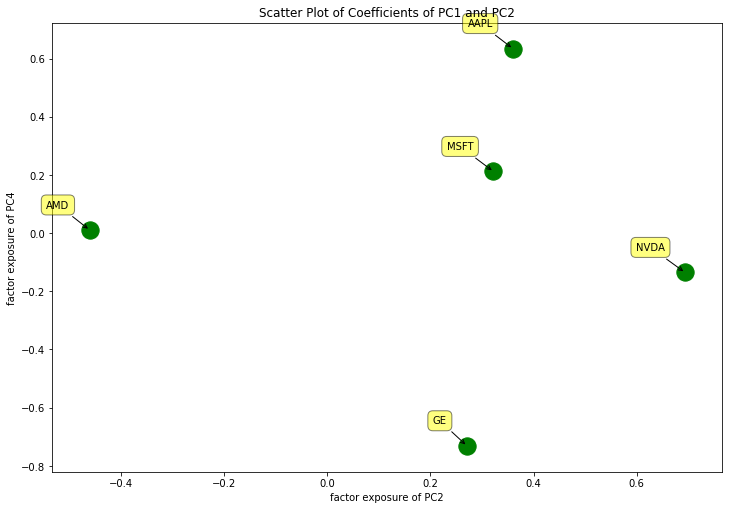

In [16]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 1], data[:, 3], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC2')
plt.ylabel('factor exposure of PC4')

for label, x, y in zip(labels, data[:, 1], data[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )

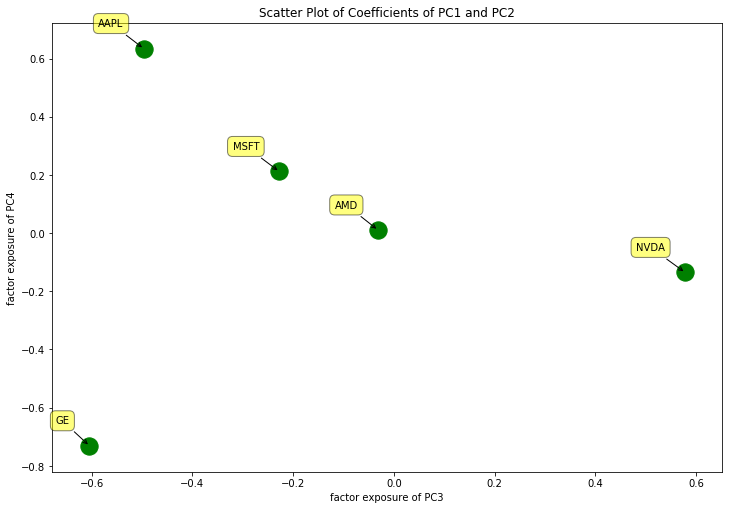

In [17]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 2], data[:, 3], marker='o', s=300, c='g',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC3')
plt.ylabel('factor exposure of PC4')

for label, x, y in zip(labels, data[:, 2], data[:, 3]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )